In [84]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ["SNORKELHOME"] = "/Users/pecastillo/Documents/snorkel/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
from snorkel.learning import GenerativeModel
from scipy import sparse


In [86]:
import pandas as pd
import pickle


In [87]:
n_samples = 1000000
y = np.random.choice([-1, 1], size=(n_samples,), p=[2./3, 1./3])
print(y)
print(len(y))

[ 1 -1  1 ..., -1 -1 -1]
1000000


(array([  29.,   69.,  118.,  129.,  149.,  151.,  130.,  106.,   84.,   35.]),
 array([ 0.01089699,  0.10899468,  0.20709238,  0.30519007,  0.40328776,
         0.50138545,  0.59948314,  0.69758083,  0.79567853,  0.89377622,
         0.99187391]),
 <a list of 10 Patch objects>)

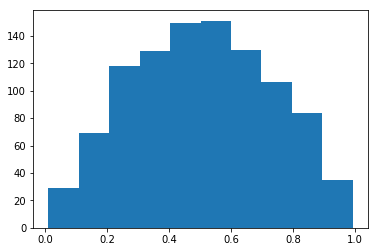

In [88]:
plt.hist(1-np.random.beta(2,2,1000))

In [89]:
total_LFs = 10
alphas = 1 - np.random.beta(2,5,total_LFs)
betas = np.random.uniform(0,1,total_LFs)
print(list(zip(alphas,betas)))

[(0.61022220949495165, 0.69515689911980616), (0.81528579369419263, 0.47429961252832264), (0.63899292827667331, 0.42115189871350656), (0.73361401847954499, 0.49411178983973014), (0.65540954867439771, 0.31397025883652918), (0.56943409234975961, 0.40212312743254242), (0.68008803400274265, 0.75922821594289325), (0.91651806369249844, 0.60437239754628935), (0.51615050666311224, 0.31502859622906842), (0.52197727944338912, 0.51180301270716866)]


In [90]:
L_names = ['LF_' + str(n_LF) for n_LF in range(total_LFs)]
LFs = {}
for n_LF in range(total_LFs):
    LF = y.copy()
    beta_idxs = np.random.choice([False, True], size=(n_samples,), p=[betas[n_LF], 1-betas[n_LF]])
    alpha_idxs = np.random.choice([False, True], size=(n_samples,), p=[alphas[n_LF], 1-alphas[n_LF]])
    LF[beta_idxs] = 0
    LF[alpha_idxs] = -LF[alpha_idxs]
    LFs[L_names[n_LF]] = LF

LFs = pd.DataFrame(LFs)
LFs

,LF_0,LF_1,LF_2,LF_3,LF_4,LF_5,LF_6,LF_7,LF_8,LF_9
0,0,-1,0,1,0,0,0,1,1,0
1,0,-1,-1,0,0,-1,0,0,-1,-1
2,-1,0,1,1,1,0,0,-1,1,-1
3,1,0,-1,0,0,0,0,1,0,1
4,-1,0,-1,0,0,0,0,0,0,-1
5,-1,1,-1,0,-1,0,-1,0,1,1
6,-1,1,0,1,0,0,-1,-1,-1,-1
7,-1,0,0,-1,-1,1,1,0,0,0
8,1,-1,0,1,-1,-1,-1,0,0,0
9,1,0,1,1,0,0,1,0,0,0


In [91]:
total = float(len(LFs))
print(total)

stats_table = np.zeros((len(L_names),2))
for i in range(len(L_names)):
    stats_table[i,0] = np.sum(LFs.iloc[:,i] != 0)/total
    stats_table[i,1] = np.sum(LFs.iloc[:,i] == y)/float(np.sum(LFs.iloc[:,i] != 0))


1000000.0


In [92]:
orig_stats = pd.DataFrame(dict(Orig_Coverage = betas, Orig_Accuracy=alphas),index=L_names)
# print(orig_stats)
stats_table = pd.DataFrame(stats_table, columns = ["Coverage", "Accuracy"], index = L_names)
# print(stats_table)
print(pd.concat([stats_table, orig_stats], axis=1))

      Coverage  Accuracy  Orig_Coverage  Orig_Accuracy
LF_0  0.695825  0.610378       0.695157       0.610222
LF_1  0.475238  0.815880       0.474300       0.815286
LF_2  0.420138  0.640375       0.421152       0.638993
LF_3  0.494243  0.733208       0.494112       0.733614
LF_4  0.312921  0.656361       0.313970       0.655410
LF_5  0.402150  0.568728       0.402123       0.569434
LF_6  0.759395  0.680040       0.759228       0.680088
LF_7  0.604654  0.916083       0.604372       0.916518
LF_8  0.314823  0.515683       0.315029       0.516151
LF_9  0.511394  0.521688       0.511803       0.521977


In [93]:
L_train = sparse.csr_matrix(LFs,dtype=int)

gen_model = GenerativeModel()

In [94]:
gen_model.train(L_train, 
                epochs=20, 
                decay=0.95, 
                step_size= 1/ L_train.shape[0], 
                reg_param=1e-20
                ,labels = y
                ,verbose = True
                ,threads=20
               )

Inferred cardinality: 2
FACTOR 0: STARTED BURN-IN...
FACTOR 0: DONE WITH BURN-IN
FACTOR 0: STARTED LEARNING
FACTOR 0: EPOCH #0
Current stepsize = 1e-06
Learning epoch took 0.000 sec.
Weights:
    weightId: 0
        isFixed: True
        weight:  1.0

    weightId: 1
        isFixed: False
        weight:  0.0

    weightId: 2
        isFixed: True
        weight:  1.0

    weightId: 3
        isFixed: False
        weight:  0.0

    weightId: 4
        isFixed: True
        weight:  1.0

    weightId: 5
        isFixed: False
        weight:  0.0

    weightId: 6
        isFixed: True
        weight:  1.0

    weightId: 7
        isFixed: False
        weight:  0.0

    weightId: 8
        isFixed: True
        weight:  1.0

    weightId: 9
        isFixed: False
        weight:  0.0

    weightId: 10
        isFixed: True
        weight:  1.0

    weightId: 11
        isFixed: False
        weight:  0.0

    weightId: 12
        isFixed: True
        weight:  1.0

    weightId: 13
  

FACTOR 0: EPOCH #6
Current stepsize = 7.350918906249998e-07
Learning epoch took 15.221 sec.
Weights:
    weightId: 0
        isFixed: True
        weight:  1.0

    weightId: 1
        isFixed: False
        weight:  -0.76746367468

    weightId: 2
        isFixed: True
        weight:  1.0

    weightId: 3
        isFixed: False
        weight:  -0.533752611239

    weightId: 4
        isFixed: True
        weight:  1.0

    weightId: 5
        isFixed: False
        weight:  -0.820617174789

    weightId: 6
        isFixed: True
        weight:  1.0

    weightId: 7
        isFixed: False
        weight:  -0.648138084535

    weightId: 8
        isFixed: True
        weight:  1.0

    weightId: 9
        isFixed: False
        weight:  -0.852801032989

    weightId: 10
        isFixed: True
        weight:  1.0

    weightId: 11
        isFixed: False
        weight:  -0.916826266888

    weightId: 12
        isFixed: True
        weight:  1.0

    weightId: 13
        isFixed: False

FACTOR 0: EPOCH #12
Current stepsize = 5.403600876626366e-07
Learning epoch took 15.287 sec.
Weights:
    weightId: 0
        isFixed: True
        weight:  1.0

    weightId: 1
        isFixed: False
        weight:  -0.766247084324

    weightId: 2
        isFixed: True
        weight:  1.0

    weightId: 3
        isFixed: False
        weight:  -0.534792428289

    weightId: 4
        isFixed: True
        weight:  1.0

    weightId: 5
        isFixed: False
        weight:  -0.822660897044

    weightId: 6
        isFixed: True
        weight:  1.0

    weightId: 7
        isFixed: False
        weight:  -0.646243709399

    weightId: 8
        isFixed: True
        weight:  1.0

    weightId: 9
        isFixed: False
        weight:  -0.853652704534

    weightId: 10
        isFixed: True
        weight:  1.0

    weightId: 11
        isFixed: False
        weight:  -0.916161782304

    weightId: 12
        isFixed: True
        weight:  1.0

    weightId: 13
        isFixed: Fal

FACTOR 0: EPOCH #18
Current stepsize = 3.972143184582182e-07
Learning epoch took 15.277 sec.
Weights:
    weightId: 0
        isFixed: True
        weight:  1.0

    weightId: 1
        isFixed: False
        weight:  -0.766920148348

    weightId: 2
        isFixed: True
        weight:  1.0

    weightId: 3
        isFixed: False
        weight:  -0.534102215492

    weightId: 4
        isFixed: True
        weight:  1.0

    weightId: 5
        isFixed: False
        weight:  -0.821714102779

    weightId: 6
        isFixed: True
        weight:  1.0

    weightId: 7
        isFixed: False
        weight:  -0.647063366177

    weightId: 8
        isFixed: True
        weight:  1.0

    weightId: 9
        isFixed: False
        weight:  -0.852946276287

    weightId: 10
        isFixed: True
        weight:  1.0

    weightId: 11
        isFixed: False
        weight:  -0.91708904631

    weightId: 12
        isFixed: True
        weight:  1.0

    weightId: 13
        isFixed: Fals

In [95]:
learned_stats = gen_model.learned_lf_stats().iloc[0:total_LFs,:]
learned_stats.index = L_names
learned_stats.columns = ['learned_'+xx for xx in learned_stats.columns]
stats_comparison = pd.concat([stats_table, orig_stats,learned_stats], axis=1)
print(stats_comparison.iloc[:,[0,2,5]])
print(stats_comparison.iloc[:,[1,3,4]])

      Coverage  Orig_Coverage  learned_Coverage
LF_0  0.695825       0.695157            0.6723
LF_1  0.475238       0.474300            0.6912
LF_2  0.420138       0.421152            0.6760
LF_3  0.494243       0.494112            0.6782
LF_4  0.312921       0.313970            0.6602
LF_5  0.402150       0.402123            0.6609
LF_6  0.759395       0.759228            0.6834
LF_7  0.604654       0.604372            0.7429
LF_8  0.314823       0.315029            0.6628
LF_9  0.511394       0.511803            0.6652
      Accuracy  Orig_Accuracy  learned_Accuracy
LF_0  0.610378       0.610222          0.615648
LF_1  0.815880       0.815286          0.717737
LF_2  0.640375       0.638993          0.594970
LF_3  0.733208       0.733614          0.666470
LF_4  0.656361       0.655410          0.570282
LF_5  0.568728       0.569434          0.538054
LF_6  0.680040       0.680088          0.708224
LF_7  0.916083       0.916518          0.841432
LF_8  0.515683       0.516151          0

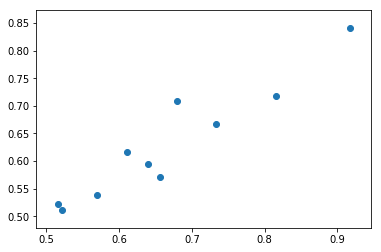

In [96]:
plt.scatter(stats_comparison['Orig_Accuracy'].values,stats_comparison['learned_Accuracy'].values)

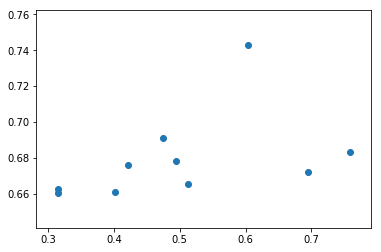

In [97]:
plt.scatter(stats_comparison['Orig_Coverage'].values,stats_comparison['learned_Coverage'].values)

In [98]:
train_marginals = gen_model.marginals(L_train)

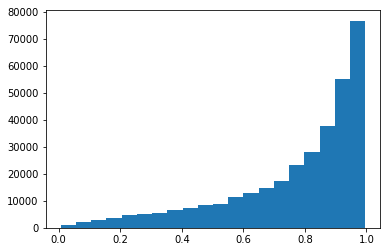

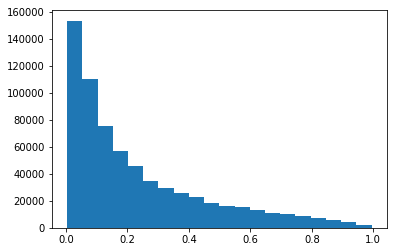

In [99]:
plt.figure()
plt.hist(train_marginals[y==1], bins=20)
plt.show()
plt.figure()
plt.hist(train_marginals[y==-1], bins=20)
plt.show()



In [106]:
marg_accuracy = np.sum([-1 if xx < 0.5 else 1 for xx in train_marginals] == y)/len(train_marginals)

print(marg_accuracy)

0.858746
